In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how to understand word labels
LE = LabelEncoder()

# Encode labels in column 'species'.
df["Gender"] = LE.fit_transform(df["Gender"])

df["Gender"].unique()

array([1, 0])

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [20]:
pca = PCA(n_components=2)

In [21]:
r_data = pca.fit_transform(df)
r_data

array([[-1.09383941e+02, -5.47845404e+00],
       [-1.08202857e+02,  3.49317649e+01],
       [-1.07376292e+02, -3.78408717e+01],
       [-1.06007807e+02,  3.05626965e+01],
       [-1.04980323e+02, -7.29674715e+00],
       [-1.03774723e+02,  2.98012381e+01],
       [-1.02996481e+02, -4.13227699e+01],
       [-1.01426745e+02,  4.70713035e+01],
       [-1.00952191e+02, -5.09237382e+01],
       [-9.93805223e+01,  2.40346077e+01],
       [-9.90706564e+01, -4.09178725e+01],
       [-9.74040858e+01,  4.91523683e+01],
       [-9.67777825e+01, -3.78938689e+01],
       [-9.52523148e+01,  3.02508027e+01],
       [-9.48417033e+01, -3.50274282e+01],
       [-9.34009908e+01,  3.26452221e+01],
       [-9.24499251e+01, -1.31741290e+01],
       [-9.12420152e+01,  2.04349779e+01],
       [-8.99471970e+01, -2.29456992e+01],
       [-8.84752130e+01,  4.81072460e+01],
       [-8.75736418e+01, -1.32190190e+01],
       [-8.63488497e+01,  2.60551150e+01],
       [-8.56046385e+01, -4.49591024e+01],
       [-8.

In [22]:
data = preprocessing.scale(r_data)

In [23]:
data = pd.DataFrame(data, columns=['X', 'Y'])
data.head()

,X,Y
0,-1.730708,-0.208398
1,-1.712020,1.328786
2,-1.698942,-1.439447
3,-1.677289,1.162589
4,-1.661032,-0.277564


# **K Means Clustering**

In [24]:
sse = []
for k in range(1, 10):
  km = KMeans(n_clusters=k)
  km.fit(data)
  sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

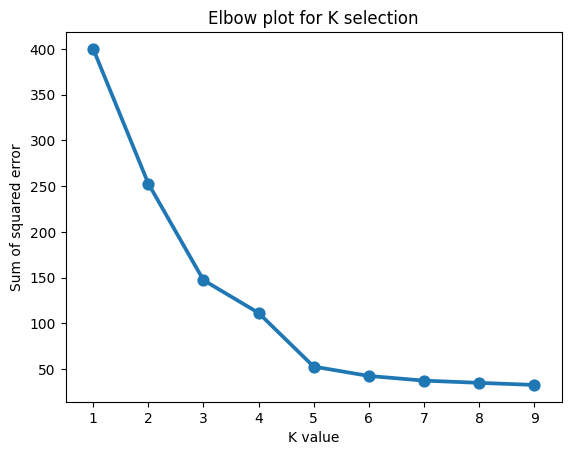

In [25]:
# plt.plot(np.arrange(1,10),sse)
sns.pointplot(x=np.arange(1,10),y=sse)
plt.title('Elbow plot for K selection')
plt.xlabel("K value")
plt.ylabel("Sum of squared error")

In [27]:
from kneed import KneeLocator
kl = KneeLocator(np.arange(1,10), sse, S=1.0, curve="convex", direction="decreasing")
print(kl.elbow)

5


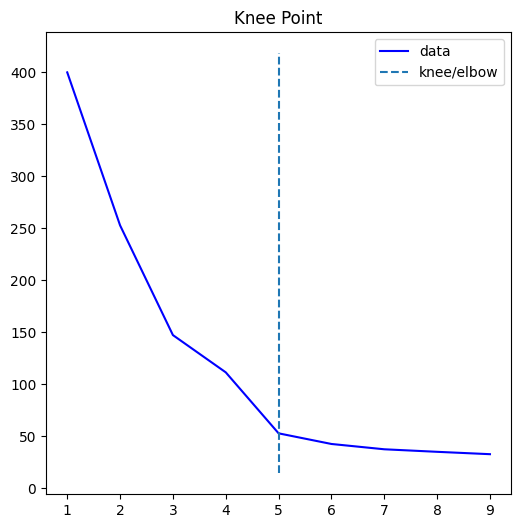

In [28]:
kl.plot_knee()

In [29]:
kmeans = KMeans(n_clusters=4)

In [30]:
cluster = kmeans.fit_predict(data[['X', 'Y']])

In [31]:
kmeans = KMeans(n_clusters=4)

In [32]:
cluster = kmeans.fit_predict(data[['X', 'Y']])

In [33]:
data['cluster'] = cluster

In [34]:
data.head()

,X,Y,cluster
0,-1.730708,-0.208398,0
1,-1.712020,1.328786,1
2,-1.698942,-1.439447,0
3,-1.677289,1.162589,1
4,-1.661032,-0.277564,0


In [35]:
data['cluster'].value_counts()

,count
cluster,
1,100
3,39
2,38
0,23


In [36]:
df1 = data[data['cluster'] == 0]
df2 = data[data['cluster'] == 1]
df3 = data[data['cluster'] == 2]
df4 = data[data['cluster'] == 3]

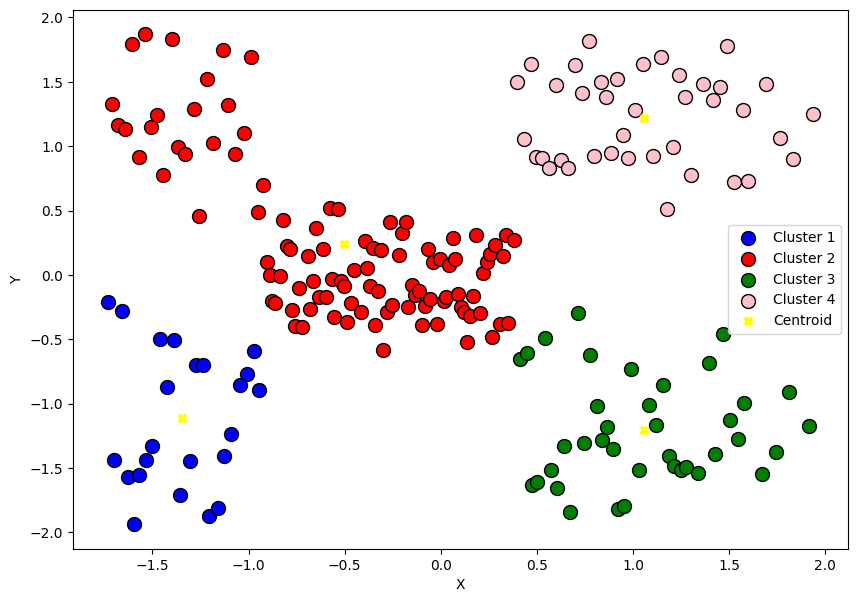

In [37]:
plt.figure(figsize=(10,7))
plt.scatter(df1.values[:,0], df1.values[:, 1], color="blue", label="Cluster 1", edgecolor="black", s=100)
plt.scatter(df2.values[:,0], df2.values[:, 1], color="red", label="Cluster 2", edgecolor="black", s=100)
plt.scatter(df3.values[:,0], df3.values[:, 1], color="green", label="Cluster 3", edgecolor="black", s=100)
plt.scatter(df4.values[:,0], df4.values[:, 1], color="pink", label="Cluster 4", edgecolor="black", s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='X', color="yellow", label="Centroid")
plt.legend()

# **DBSCAN Cluster**

In [38]:
db = DBSCAN(eps=1.0, metric="euclidean")

In [39]:
pr = db.fit_predict(data)

In [40]:
data['cluster'] = pr

In [41]:
data.head()

,X,Y,cluster
0,-1.730708,-0.208398,0
1,-1.712020,1.328786,1
2,-1.698942,-1.439447,0
3,-1.677289,1.162589,1
4,-1.661032,-0.277564,0


In [42]:
data['cluster'].value_counts()

,count
cluster,
1,100
2,39
3,38
0,23


In [43]:
outliers_data = data[data['cluster'] == -1]
cluster1_data = data[data['cluster'] == 0]
cluster2_data = data[data['cluster'] == 1]
cluster3_data = data[data['cluster'] == 2]
cluster4_data = data[data['cluster'] == 3]

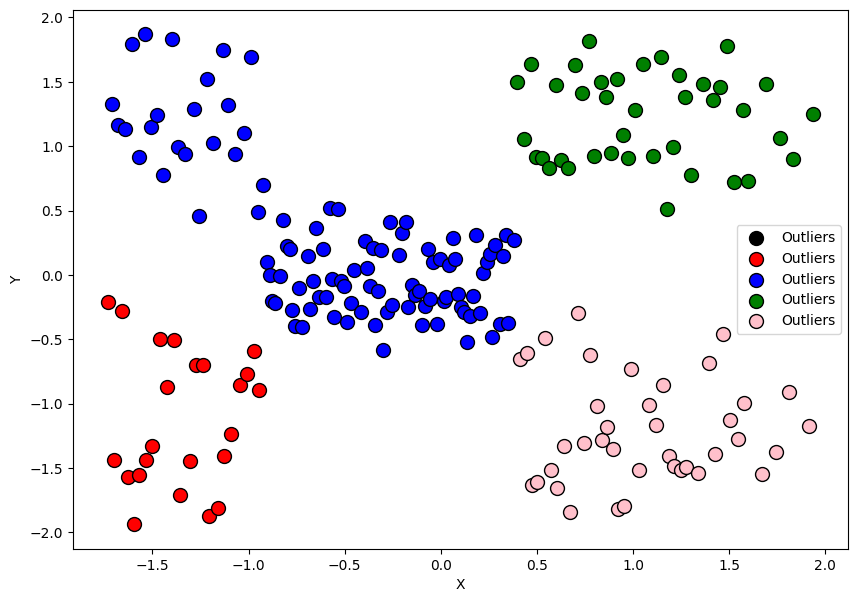

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(outliers_data['X'], outliers_data['Y'], color="black", label="Outliers", edgecolors="black", s=100)
plt.scatter(cluster1_data['X'], cluster1_data['Y'], color="red", label="Outliers", edgecolors="black", s=100)
plt.scatter(cluster2_data['X'], cluster2_data['Y'], color="blue", label="Outliers", edgecolors="black", s=100)
plt.scatter(cluster3_data['X'], cluster3_data['Y'], color="green", label="Outliers", edgecolors="black", s=100)
plt.scatter(cluster4_data['X'], cluster4_data['Y'], color="pink", label="Outliers", edgecolors="black", s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# **Hierarchical Clustering**

In [45]:
import scipy.cluster.hierarchy as sch

In [46]:
data1 = data.sample(100)

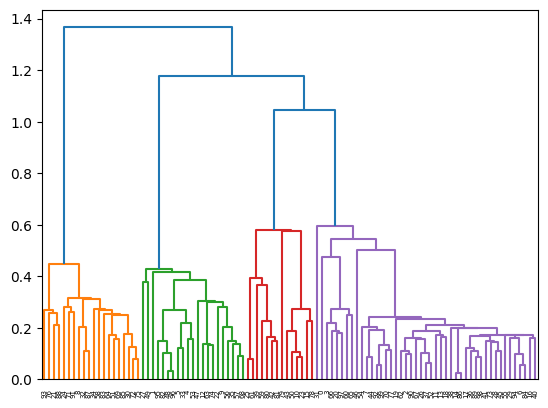

In [47]:
dend = sch.dendrogram(sch.linkage(data1.values, method="single"))

In [48]:
H = AgglomerativeClustering(n_clusters=2, linkage="single")

In [49]:
pred = H.fit_predict(data)

In [50]:
temp = data

In [51]:
temp['cluster'] = pred

In [52]:
temp['cluster'].value_counts()

,count
cluster,
0,162
1,38


In [53]:
temp1 = temp[temp['cluster'] == 0]
temp2 = temp[temp['cluster'] == 1]

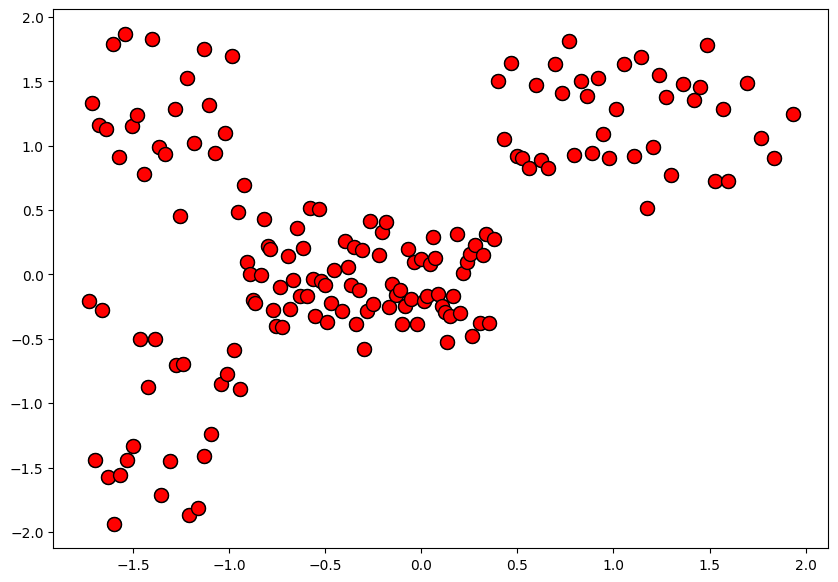

In [54]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0], temp1.values[:,1], color="green", label="Cluster 1", edgecolors="black", s=100)
plt.scatter(temp1.values[:,0], temp1.values[:,1], color="red", label="Cluster 2", edgecolors="black", s=100)

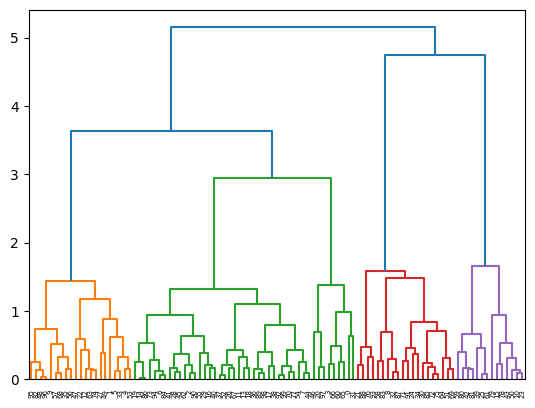

In [55]:
dend = sch.dendrogram(sch.linkage(data1.values, method="complete"))

In [56]:
H = AgglomerativeClustering(n_clusters=2, linkage="complete")

In [57]:
pred = H.fit_predict(data)

In [58]:
temp = data

In [59]:
temp['cluster'].value_counts()

,count
cluster,
0,162
1,38


In [60]:
temp1 = temp[temp['cluster'] == 0]
temp2 = temp[temp['cluster'] == 1]

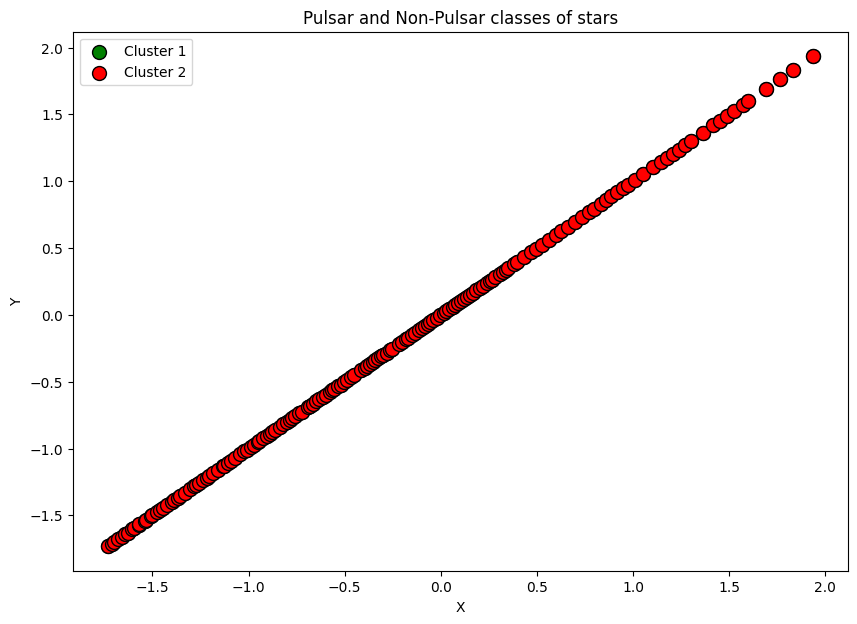

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0], temp1.values[:,0], color="green", label="Cluster 1", edgecolors="black", s=100)
plt.scatter(temp1.values[:,0], temp1.values[:,0], color="red", label="Cluster 2", edgecolors="black", s=100)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Pulsar and Non-Pulsar classes of stars")
plt.legend()